In [1]:
import pandas as pd
import requests
from bs4 import BeautifulSoup
from unidecode import unidecode
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
url_melluso = "https://www.melluso.com/it/"
print(url_melluso)

https://www.melluso.com/it/


In [3]:
spans = BeautifulSoup(requests.get(url_melluso).text).find_all("span")
spans_txt = []
for span in spans:
    spans_txt.append(span.text)

cat_donna = spans_txt[23:32]
cat_uomo = spans_txt[38:43]

In [4]:
print(cat_donna)

['Dècolletè', 'Sneakers', 'Mocassini', 'Stivaletti', 'Stivali', 'Tacchi bassi', 'Tacchi alti', 'Cerimonia', 'Pantofole']


In [5]:
print(cat_uomo)

['Mocassini Uomo', 'Classiche', 'Sneakers', 'Stivaletti', 'Pantofole']


In [6]:
url_donna = url_melluso + "melluso-donna/"
print(url_donna)

https://www.melluso.com/it/melluso-donna/


In [7]:
url_uomo = url_melluso + "uomo/"
print(url_uomo)

https://www.melluso.com/it/uomo/


In [8]:
#modifico le categorie per prendere i nomi gli url esatti
for i in range(0, len(cat_donna)):
    cat_donna[i] = unidecode(cat_donna[i]).lower()

cat_donna[2] = "donna-mocassini"
cat_donna[4] = "melluso-donna-stivali-html"
cat_donna[5] = "tacchi-comodi"
cat_donna[6] = "tacchi-alti"

print(cat_donna)

['decollete', 'sneakers', 'donna-mocassini', 'stivaletti', 'melluso-donna-stivali-html', 'tacchi-comodi', 'tacchi-alti', 'cerimonia', 'pantofole']


In [9]:
for i in range(0, len(cat_uomo)):
    cat_uomo[i] = unidecode(cat_uomo[i]).lower()

cat_uomo[0] = "mocassini-uomo"

print(cat_uomo)

['mocassini-uomo', 'classiche', 'sneakers', 'stivaletti', 'pantofole']


In [10]:
sexx = ["donna", "uomo"]

In [11]:
#inizializzo
stringhe = []
prodotti = []
sesso = []
categorie = []
sotto_categorie = []
colori = []
prezzi_fin = []
prezzi_old = []
contatore = 0

In [12]:
for sex in sexx:
    if sex == "donna":
        cat_sex = cat_donna
        url_sex = url_donna
        num_max = 23
    else:
        cat_sex = cat_uomo
        url_sex = url_uomo
        num_max = 4
    #for sulle categorie
    for cat in cat_sex:
        #for sulle pagine web
        for i in range(1, num_max):
            url_cat = url_sex + cat + ".html?p=" + str(i)
            print(url_cat)
            testi = BeautifulSoup(requests.get(url_cat).text).find_all("a", class_="product-item-link")
            if len(testi) > 0:
                print("yes")
                for testo in testi:
                    contatore += 1
                    print(contatore)
                    print(testo.text)
                    #se prodotto e' gift card
                    if testo.text == "Melluso Gift Card Virtuale":
                        prodotto = "Gift Card"
                        categoria = ""
                        sotto_categoria = ""
                        colore = ""
                        prezzo_fin = 50.00
                        prezzo_old = 50.00

                    #se prodotto e' una scarpa
                    else:
                        prodotto = testo.text.split(" ")[-1]
                        categoria = cat
                        sotto_categoria = testo.text.split(" ")[0]                   
                        colore = testo.text.split(" ")[-2]       
                        scarpa_soup = BeautifulSoup(requests.get(testo.get("href")).text)
                        #prezzo finale
                        final_price_long = scarpa_soup.find("span", attrs={"data-price-type": "finalPrice"})
                        if final_price_long is None:
                            prezzo_fin = np.NaN
                        else:
                            prezzo_fin = final_price_long.text.split()[0].replace(",",".")
                            prezzo_fin = float(prezzo_fin)
                        #prezzo iniziale    
                        old_price_long = scarpa_soup.find("span", attrs={"data-price-type": "oldPrice"})
                        if old_price_long is None:
                            prezzo_old = np.NaN
                        else:
                            prezzo_old = old_price_long.text.split()[0].replace(",",".")
                            prezzo_old = float(prezzo_old)
                    
                    stringhe.append(testo.text)
                    prodotti.append(prodotto)
                    sesso.append(sex)
                    categorie.append(categoria)
                    sotto_categorie.append(sotto_categoria)
                    colori.append(colore)    
                    prezzi_fin.append(prezzo_fin)
                    prezzi_old.append(prezzo_old)
            
            print("\n")

https://www.melluso.com/it/melluso-donna/decollete.html?p=1
yes
1
Dècolletè donna comodo in pelle nude r30611z
2
Melluso Gift Card Virtuale
3
Décolleté donna slingback in pelle nude e bianco e1690
4
Décolleté donna in pelle acero d5176w
5
Décolleté donna in camoscio zebra verde d5176w
6
Décolleté donna in camoscio zebra cioccolato d5176w
7
Décolleté donna in camoscio vino d5178w
8
Décolleté donna in pelle nero d5178w
9
Décolleté donna in camoscio nero d5185w
10
Décolleté donna in camoscio petrolio d5185w
11
Décolleté donna in pelle nero d5185w


https://www.melluso.com/it/melluso-donna/decollete.html?p=2
yes
12
Décolleté donna in camoscio acero d5185w
13
Décolleté donna in pelle blu notte d5125w
14
Décolleté donna in camoscio rovere d5125w
15
Décolleté donna con cinturino in vernice nero d5126w
16
Décolleté donna con cinturino in camoscio nero d5126w
17
Décolleté donna con cinturino in camoscio rovere d5126w
18
Décolleté donna con cinturino in camoscio acero d5126w
19
Décolleté donna i

In [13]:
stringhe2 = stringhe.copy()
prodotti2 = prodotti.copy()
sesso2 = sesso.copy()
categorie2 = categorie.copy()
colori2 = colori.copy()
prezzi_fin2 = prezzi_fin.copy()
prezzi_old2 = prezzi_old.copy()

In [14]:
print(len(prodotti))
print(len(prezzi_fin))

954
954


In [15]:
melluso_df = pd.DataFrame(
    {"Info": stringhe,
     "Nome": prodotti,
     "Sesso": sesso,
     "Categoria": categorie,
     "Sotto_categoria": sotto_categorie,
     "Colore": colori,
     "Prezzo_finale": prezzi_fin,
     "Prezzo_originale": prezzi_old}
)

In [16]:
melluso_df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale
0,Dècolletè donna comodo in pelle nude r30611z,r30611z,donna,decollete,Dècolletè,nude,125.00,NaN
1,Melluso Gift Card Virtuale,Gift Card,donna,,,,50.00,50.0
2,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,Décolleté,bianco,134.91,149.9
3,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,Décolleté,acero,104.93,149.9
4,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,Décolleté,verde,111.93,159.9
...,...,...,...,...,...,...,...,...
949,Pantofola uomo in tessuto camoscio verde pu167w,pu167w,uomo,pantofole,Pantofola,verde,39.92,49.9
950,Pantofola uomo in tessuto grigio pu809w,pu809w,uomo,pantofole,Pantofola,grigio,36.00,45.0
951,Pantofola uomo in tessuto camoscio blu pu167w,pu167w,uomo,pantofole,Pantofola,blu,39.92,49.9
952,Pantofola uomo in ecopelle marrone pu150w,pu150w,uomo,pantofole,Pantofola,marrone,31.92,39.9


In [17]:
melluso_df.to_csv("melluso.csv", index=None)

In [18]:
df = pd.read_csv("melluso.csv")

In [19]:
df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale
0,Dècolletè donna comodo in pelle nude r30611z,r30611z,donna,decollete,Dècolletè,nude,125.00,NaN
1,Melluso Gift Card Virtuale,Gift Card,donna,NaN,NaN,NaN,50.00,50.0
2,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,Décolleté,bianco,134.91,149.9
3,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,Décolleté,acero,104.93,149.9
4,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,Décolleté,verde,111.93,159.9
...,...,...,...,...,...,...,...,...
949,Pantofola uomo in tessuto camoscio verde pu167w,pu167w,uomo,pantofole,Pantofola,verde,39.92,49.9
950,Pantofola uomo in tessuto grigio pu809w,pu809w,uomo,pantofole,Pantofola,grigio,36.00,45.0
951,Pantofola uomo in tessuto camoscio blu pu167w,pu167w,uomo,pantofole,Pantofola,blu,39.92,49.9
952,Pantofola uomo in ecopelle marrone pu150w,pu150w,uomo,pantofole,Pantofola,marrone,31.92,39.9


In [20]:
df.Categoria.value_counts()

Categoria
tacchi-comodi                 259
decollete                     174
donna-mocassini               104
stivaletti                     96
tacchi-alti                    82
cerimonia                      63
sneakers                       56
mocassini-uomo                 35
classiche                      30
pantofole                      28
melluso-donna-stivali-html     15
Name: count, dtype: int64

In [21]:
df.Sotto_categoria = df.Sotto_categoria.str.replace("Décolleté","decollete")
df.Sotto_categoria = df.Sotto_categoria.str.replace("Dècolletè","decollete")

In [22]:
df.Sotto_categoria = df.Sotto_categoria.str.lower()
print(df.Sotto_categoria)

0      decollete
1            NaN
2      decollete
3      decollete
4      decollete
         ...    
949    pantofola
950    pantofola
951    pantofola
952    pantofola
953    pantofola
Name: Sotto_categoria, Length: 954, dtype: object


In [23]:
df.groupby(["Categoria"])["Prezzo_originale"].mean()

Categoria
cerimonia                     111.963492
classiche                     170.266667
decollete                     135.787742
donna-mocassini               141.350495
melluso-donna-stivali-html    187.900000
mocassini-uomo                158.002857
pantofole                      49.739286
sneakers                      147.469091
stivaletti                    157.135106
tacchi-alti                   132.984615
tacchi-comodi                 132.121992
Name: Prezzo_originale, dtype: float64

In [24]:
df.Prezzo_originale.isna().sum()

47

In [25]:
df["Prezzo_originale"] = df["Prezzo_originale"].fillna(df["Prezzo_finale"])

In [26]:
df.Prezzo_originale.isna().sum()

5

In [27]:
df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale
0,Dècolletè donna comodo in pelle nude r30611z,r30611z,donna,decollete,decollete,nude,125.00,125.0
1,Melluso Gift Card Virtuale,Gift Card,donna,NaN,NaN,NaN,50.00,50.0
2,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,decollete,bianco,134.91,149.9
3,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,decollete,acero,104.93,149.9
4,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,decollete,verde,111.93,159.9
...,...,...,...,...,...,...,...,...
949,Pantofola uomo in tessuto camoscio verde pu167w,pu167w,uomo,pantofole,pantofola,verde,39.92,49.9
950,Pantofola uomo in tessuto grigio pu809w,pu809w,uomo,pantofole,pantofola,grigio,36.00,45.0
951,Pantofola uomo in tessuto camoscio blu pu167w,pu167w,uomo,pantofole,pantofola,blu,39.92,49.9
952,Pantofola uomo in ecopelle marrone pu150w,pu150w,uomo,pantofole,pantofola,marrone,31.92,39.9


In [28]:
#salvo
df.to_csv("melluso.csv", index=None)

In [29]:
df["Sconto"] = ((df.Prezzo_originale - df.Prezzo_finale)/df.Prezzo_originale)*100

In [30]:
df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto
0,Dècolletè donna comodo in pelle nude r30611z,r30611z,donna,decollete,decollete,nude,125.00,125.0,0.0
1,Melluso Gift Card Virtuale,Gift Card,donna,NaN,NaN,NaN,50.00,50.0,0.0
2,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,decollete,bianco,134.91,149.9,10.0
3,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,decollete,acero,104.93,149.9,30.0
4,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,decollete,verde,111.93,159.9,30.0
...,...,...,...,...,...,...,...,...,...
949,Pantofola uomo in tessuto camoscio verde pu167w,pu167w,uomo,pantofole,pantofola,verde,39.92,49.9,20.0
950,Pantofola uomo in tessuto grigio pu809w,pu809w,uomo,pantofole,pantofola,grigio,36.00,45.0,20.0
951,Pantofola uomo in tessuto camoscio blu pu167w,pu167w,uomo,pantofole,pantofola,blu,39.92,49.9,20.0
952,Pantofola uomo in ecopelle marrone pu150w,pu150w,uomo,pantofole,pantofola,marrone,31.92,39.9,20.0


In [31]:
df["Azienda"] = "Melluso"

In [63]:
df

,Info,Nome,Sesso,Categoria,Sotto_categoria,Colore,Prezzo_finale,Prezzo_originale,Sconto,Azienda
0,Dècolletè donna comodo in pelle nude r30611z,r30611z,donna,decollete,decollete,nude,125.00,125.0,0.0,Melluso
1,Melluso Gift Card Virtuale,Gift Card,donna,NaN,NaN,NaN,50.00,50.0,0.0,Melluso
2,Décolleté donna slingback in pelle nude e bian...,e1690,donna,decollete,decollete,bianco,134.91,149.9,10.0,Melluso
3,Décolleté donna in pelle acero d5176w,d5176w,donna,decollete,decollete,acero,104.93,149.9,30.0,Melluso
4,Décolleté donna in camoscio zebra verde d5176w,d5176w,donna,decollete,decollete,verde,111.93,159.9,30.0,Melluso
...,...,...,...,...,...,...,...,...,...,...
949,Pantofola uomo in tessuto camoscio verde pu167w,pu167w,uomo,pantofole,pantofola,verde,39.92,49.9,20.0,Melluso
950,Pantofola uomo in tessuto grigio pu809w,pu809w,uomo,pantofole,pantofola,grigio,36.00,45.0,20.0,Melluso
951,Pantofola uomo in tessuto camoscio blu pu167w,pu167w,uomo,pantofole,pantofola,blu,39.92,49.9,20.0,Melluso
952,Pantofola uomo in ecopelle marrone pu150w,pu150w,uomo,pantofole,pantofola,marrone,31.92,39.9,20.0,Melluso


<Axes: xlabel='Categoria'>

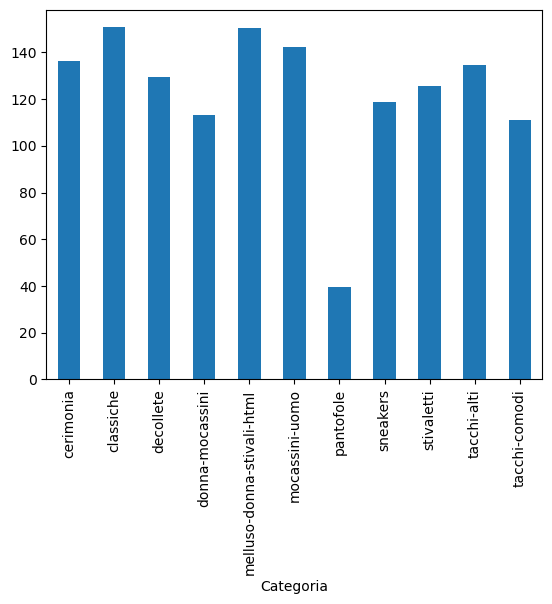

In [32]:
df.groupby(["Categoria"])["Prezzo_finale"].mean().plot(kind="bar")

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
 [Text(0, 0, 'decollete'),
  Text(1, 0, 'sneakers'),
  Text(2, 0, 'donna-mocassini'),
  Text(3, 0, 'stivaletti'),
  Text(4, 0, 'melluso-donna-stivali-html'),
  Text(5, 0, 'tacchi-comodi'),
  Text(6, 0, 'tacchi-alti'),
  Text(7, 0, 'cerimonia'),
  Text(8, 0, 'pantofole'),
  Text(9, 0, 'mocassini-uomo'),
  Text(10, 0, 'classiche')])

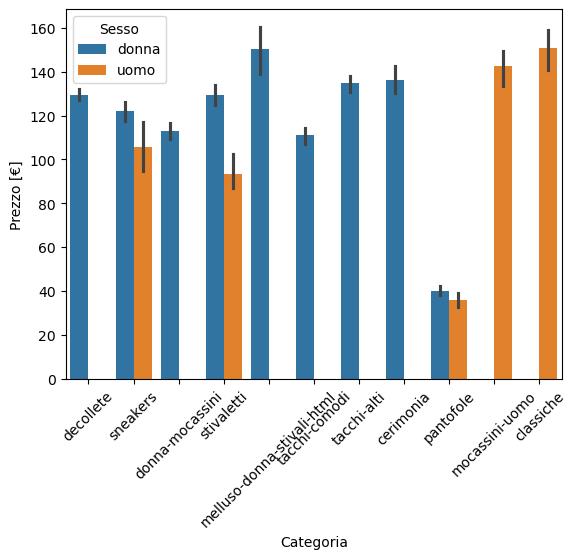

In [33]:
sns.barplot(data=df, x=df.Categoria, y=df.Prezzo_finale, hue=df.Sesso, estimator="mean")
plt.ylabel("Prezzo [€]")
plt.xticks(rotation=45)

In [34]:
df.Colore.unique()

array(['nude', nan, 'bianco', 'acero', 'verde', 'cioccolato', 'vino',
       'nero', 'petrolio', 'notte', 'rovere', 'onion', 'tortora', 'viola',
       'moro', 'bordo', 'navy', 'beige', 'platino', 'marrone', 'grigio',
       'abyss', 'fondotinta', 'lilla', 'phard', 'argento', 'contour',
       'carne', 'milk', 'kiss', 'glicine', 'acid', 'cielo', 'sella',
       'cipria', 'rosa', 'blu', 'latte', 'daino', 'coco', 'topo', 'taope',
       'sigaro', 'cuoio', 'caramello', 'ebano', 'visone', 'marmo',
       'cocoa', 'antico', 'sottobosco', 'brick', 'mimetico', 'rubino',
       'elasticizzato', 'rossiccio', 'castoro', 'rosso', 'steppa',
       'cannella', 'allacciato', 'oro', 'sand', 'scuro', 'brandy',
       'brown'], dtype=object)

In [66]:
df.to_csv("melluso_finale.csv", index=None)